# Equation of Time

## Function to calculate B - equation 1.4.2 page 9

In [7]:
def calculate_B(n):
    "Calculates B given the day number n"
    B = (n-1) * 360 / 365
    return B

## Function to calcuate the Equation of Time -  Equation 1.5.3. Page 11

In [8]:
import math
def calculate_E(B):
    E = 229.2 * (0.000075 
                 + 0.001868 * math.cos( math.radians(B))
                 - 0.032077 * math.sin( math.radians(B))
                 - 0.014615 * math.cos( math.radians(2*B))
                 - 0.04089 * math.sin ( math.radians(2*B))
                )
    return E

Example 1.5.1 - for n=34, E should equal -13.5 minutes

In [10]:
n=34
B=calculate_B(n)
E=calculate_E(B)
E

-13.488456930500913

## Recreate Figure 1.5.1

In [14]:
n_list=list(range(1,366))

In [15]:
results=[calculate_E(calculate_B(n)) for n in n_list]

In [16]:
import pandas as pd
days_in_year=pd.date_range(start=pd.datetime(2019,1,1),freq="1D",periods=365)

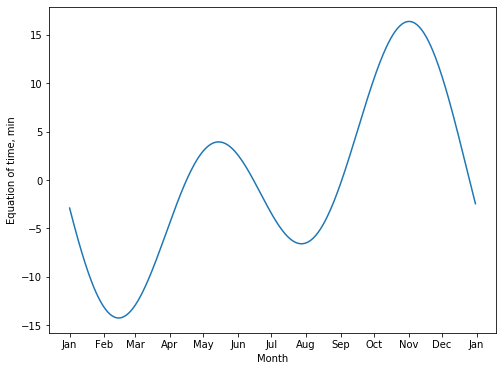

Figure 1.5.1 The equation of time E as a function of tiem of year.


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.dates as mdates

fig, ax = plt.subplots(1,figsize=(8,6))
ax.plot_date(days_in_year,results,'-',xdate=True)

months = mdates.MonthLocator()  
months_fmt = mdates.DateFormatter('%b')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)

ax.xaxis.set_label_text('Month')
ax.yaxis.set_label_text('Equation of time, min')

plt.savefig('Figure_1_5_1.png', bbox_inches='tight')
plt.show()
print('Figure 1.5.1 The equation of time E as a function of time of year.')
